In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("pca_transformed_output.csv")
df.head()

,PC1,PC2,PC3,PC4,PC5,label
0,-2.260593,-0.344510,-1.609809,-1.053710,0.947905,0
1,-0.133474,3.105938,1.462322,0.828849,-1.380897,0
2,-1.977600,-0.341556,-1.687737,-1.246947,1.309119,0
3,-1.479357,0.897614,-0.858482,1.035689,-0.989909,0
4,-1.680400,2.221787,-1.015449,2.698644,1.534467,1


In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv("pca_transformed_output.csv")

# Step 2: Split the data into features and target
# Assuming the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')  # Use 'liblinear' for small datasets

# Step 5: Perform cross-validation on the training data
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

# Step 7: Train the model on the full training set
log_reg.fit(X_train, y_train)

# Step 8: Evaluate the model on the test set
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


Cross-Validation Scores: [0.78593041 0.80257186 0.78971256 0.79182438 0.77668433]
Mean CV Score: 0.7893447063094594
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       825
           1       0.79      0.82      0.80       827

    accuracy                           0.80      1652
   macro avg       0.80      0.80      0.80      1652
weighted avg       0.80      0.80      0.80      1652



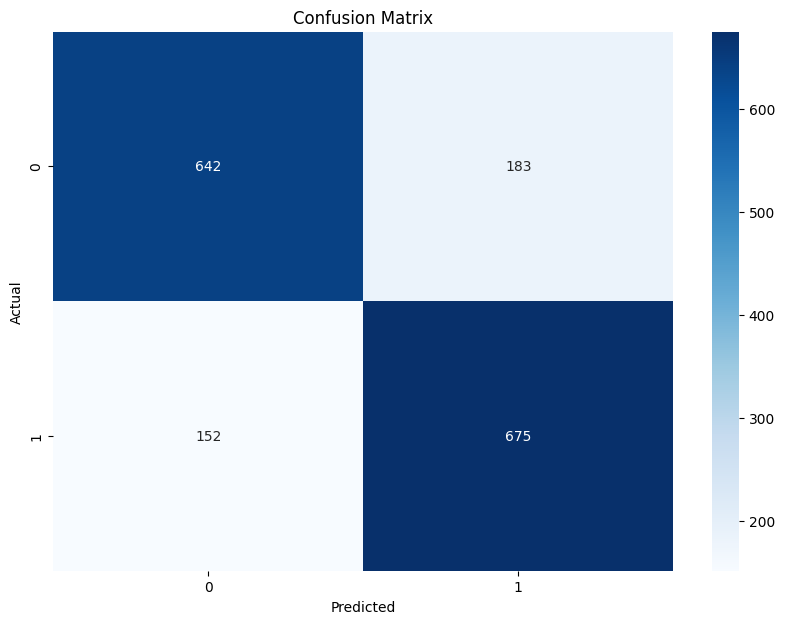

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()